<a href="https://colab.research.google.com/github/ravibarquecontech/gitignore/blob/main/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [137]:
df = pd.read_csv("/content/sample_data/Virat-Kohli-International-Cricket-Centuries.csv",parse_dates=True)

In [138]:
df.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,24-Dec-09,Won
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,28-Nov-10,Won
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,19-Feb-11,Won


In [139]:
df.tail()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
70,71,122*,Afghanistan,2,1,"Dubai International Cricket Stadium, Dubai",Neutral,08-Sep-22,Won
71,72,113,Bangladesh,3,1,"Zohur Ahmed Chowdhury Stadium, Chittagong",Away,10-Dec-22,Won
72,73,113,Sri Lanka,3,1,"ACA Stadium, Guwahati",Home,10-Jan-23,Won
73,74,166*,Sri Lanka,3,1,"Greenfield International Stadium, Thiruvananth...",Home,15-Jan-23,Won
74,75,186,Australia,4,2,"Narendra Modi Stadium, Ahmedabad",Home,09-Mar-23,Drawn


In [140]:
df.shape

(75, 9)

In [141]:
df.describe()

,No.,Position,Innings
count,75.000000,75.000000,75.000000
mean,38.000000,3.520000,1.706667
std,21.794495,0.664953,0.673300
min,1.000000,2.000000,1.000000
25%,19.500000,3.000000,1.000000
50%,38.000000,3.000000,2.000000
75%,56.500000,4.000000,2.000000
max,75.000000,6.000000,4.000000


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No.       75 non-null     int64 
 1   Runs      75 non-null     object
 2   Against   75 non-null     object
 3   Position  75 non-null     int64 
 4   Innings   75 non-null     int64 
 5   Venue     75 non-null     object
 6   Ground    75 non-null     object
 7   Date      75 non-null     object
 8   Result    75 non-null     object
dtypes: int64(3), object(6)
memory usage: 5.4+ KB


In [143]:
df.dtypes

,0
No.,int64
Runs,object
Against,object
Position,int64
Innings,int64
Venue,object
Ground,object
Date,object
Result,object


In [144]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-144-b9c6864122be>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [145]:
df.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,2009-12-24,Won
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2010-01-11,Won
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,2010-10-20,Won
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,2010-11-28,Won
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2011-02-19,Won


In [146]:
df['Year'] = df['Date'].dt.year
df['Runs']=df['Runs'].astype(str)

# Create the 'Out/Not-Out' column directly
df['Out/Not-Out'] = df['Runs'].str.contains(r'[^\w\s]', regex=True)

# Replace True/False with 'Not Out'/'Out'
df['Out/Not-Out'] = df['Out/Not-Out'].replace({True: 'Not Out', False: 'Out'})

df.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result,Year,Out/Not-Out
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,2009-12-24,Won,2009,Out
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2010-01-11,Won,2010,Not Out
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,2010-10-20,Won,2010,Out
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,2010-11-28,Won,2010,Out
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2011-02-19,Won,2011,Not Out


In [147]:
# Remove all non-digit characters from the 'Runs' column
df['Runs'] = df['Runs'].str.replace(r'\D', '', regex=True)

# Convert the 'Runs' column to integers, handling potential errors
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')

df['Runs']=df['Runs'].astype(str).astype(int)

In [148]:
df['Runs'].max()

254

In [149]:
df['Against'].value_counts()

,count
Against,
Australia,16
Sri Lanka,15
West Indies,11
New Zealand,8
England,8
South Africa,7
Bangladesh,6
Pakistan,2
Zimbabwe,1


In [150]:
df['Position'].value_counts()

,count
Position,
3,39
4,31
5,3
6,1
2,1


In [151]:
df['Innings'].value_counts()

,count
Innings,
2,41
1,29
3,3
4,2


In [152]:
df['Venue'].value_counts()

,count
Venue,
"Adelaide Oval, Adelaide",5
"Sher-e-Bangla Cricket Stadium, Dhaka",4
"Eden Gardens, Kolkata",3
"Queen's Park Oval, Port of Spain",3
"Maharashtra Cricket Association Stadium, Pune",3
"R. Premadasa Stadium, Colombo",3
"Vidarbha Cricket Association Stadium, Nagpur",3
"Galle International Stadium, Galle",2
"Melbourne Cricket Ground, Melbourne",2


In [153]:
df['Ground'].value_counts()

,count
Ground,
Home,35
Away,35
Neutral,5


In [154]:
df['Result'].value_counts()

,count
Result,
Won,51
Lost,13
Drawn,8
Lost (D/L),1
Won (D/L),1
Tied,1


In [155]:
df['Out/Not-Out'].value_counts()

,count
Out/Not-Out,
Out,54
Not Out,21


In [156]:
df['Year'].value_counts()

,count
Year,
2017,11
2018,11
2012,8
2014,8
2016,7
2019,7
2013,6
2011,4
2015,4


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ' Australia'),
  Text(1, 0, ' Sri Lanka'),
  Text(2, 0, ' West Indies'),
  Text(3, 0, ' New Zealand'),
  Text(4, 0, ' England'),
  Text(5, 0, ' South Africa'),
  Text(6, 0, ' Bangladesh'),
  Text(7, 0, ' Pakistan'),
  Text(8, 0, ' Zimbabwe'),
  Text(9, 0, ' Afghanistan')])

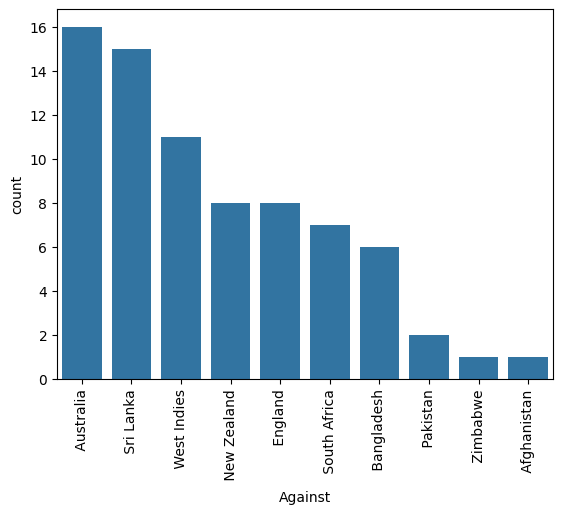

In [157]:
sns.countplot(data=df,x="Against",order=df["Against"].value_counts().index)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '2')])

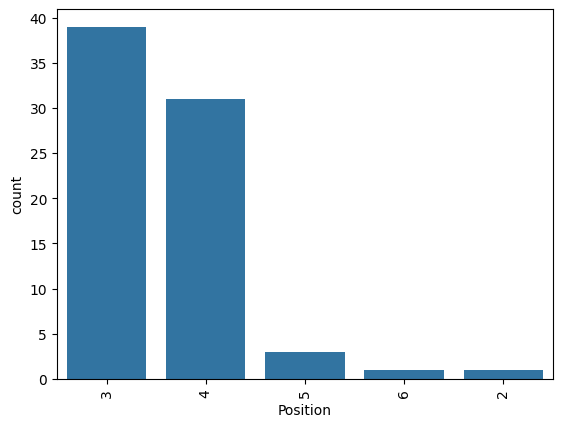

In [158]:
sns.countplot(data=df,x="Position",order=df["Position"].value_counts().index)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ' Sri Lanka'),
  Text(1, 0, ' Bangladesh'),
  Text(2, 0, ' Australia'),
  Text(3, 0, ' New Zealand'),
  Text(4, 0, ' England'),
  Text(5, 0, ' West Indies'),
  Text(6, 0, ' Pakistan'),
  Text(7, 0, ' Zimbabwe'),
  Text(8, 0, ' South Africa'),
  Text(9, 0, ' Afghanistan')])

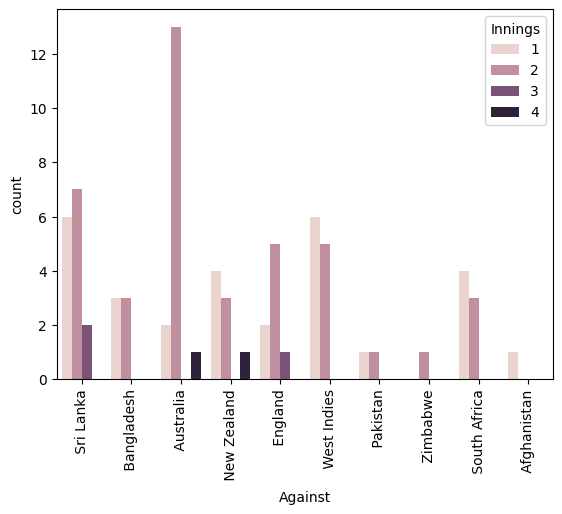

In [159]:
sns.countplot(data=df,x="Against",hue="Innings")
plt.xticks(rotation=90)

([0, 1, 2], [Text(0, 0, 'Home'), Text(1, 0, 'Away'), Text(2, 0, 'Neutral')])

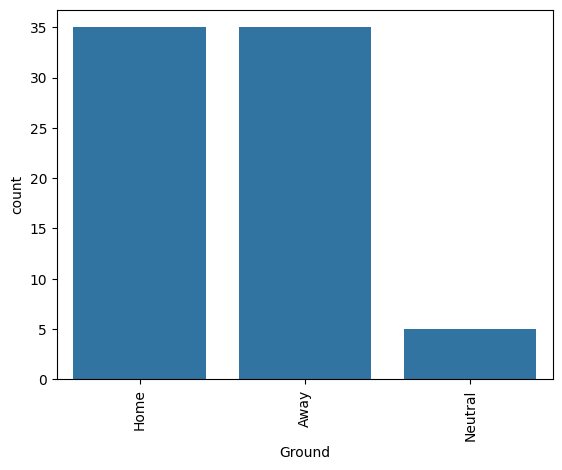

In [160]:
sns.countplot(data=df,x="Ground")
plt.xticks(rotation=90)

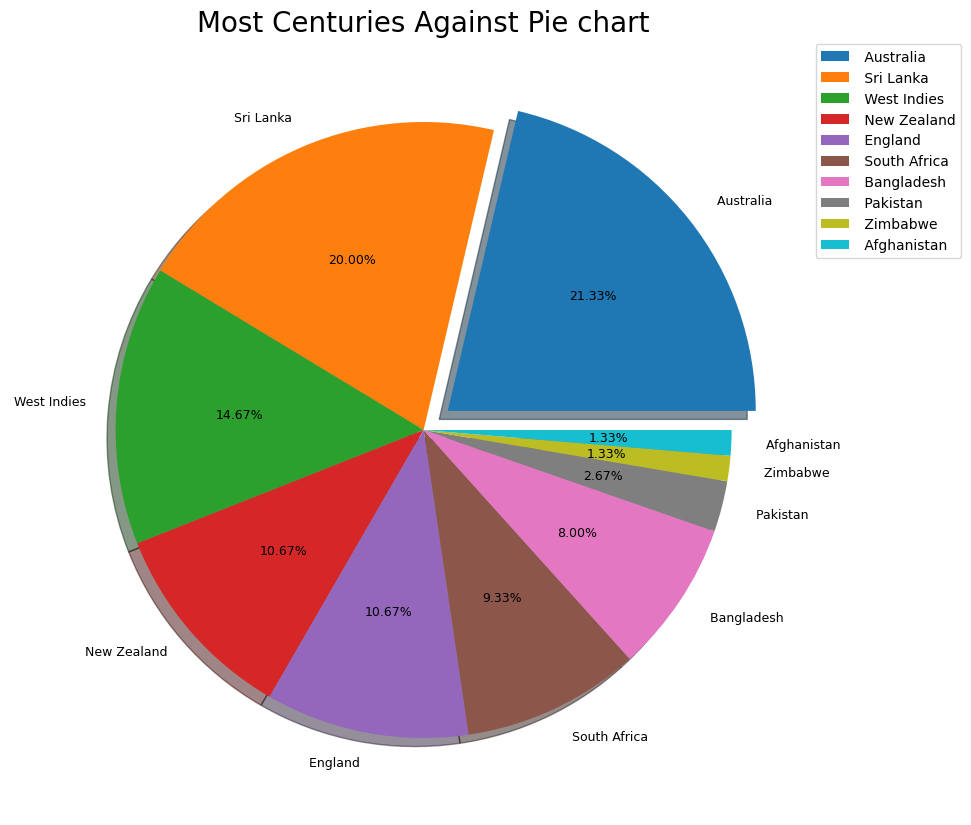

In [161]:
label = df['Against'].value_counts()
plt.figure(figsize = (20,10))
explode = [0.1,0,0,0,0,0,0,0,0,0,]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',]
plt.pie(label, labels=label.index, autopct='%1.2f%%', textprops={'fontsize':9},shadow =True, explode=explode, colors=colors)
plt.title('Most Centuries Against Pie chart', fontdict={"fontsize":20}, pad=10)
plt.legend(bbox_to_anchor=[1,1.01])
plt.show()